In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# pip install librosa
!pip install librosa

In [ ]:
import pandas as pd
import numpy as np
import sklearn


In [ ]:
import sklearn
import IPython.display as ipd
filepath = r"/content/drive/MyDrive/Animal ds/test_ds/dog_bark.wav"
ipd.Audio(filepath)

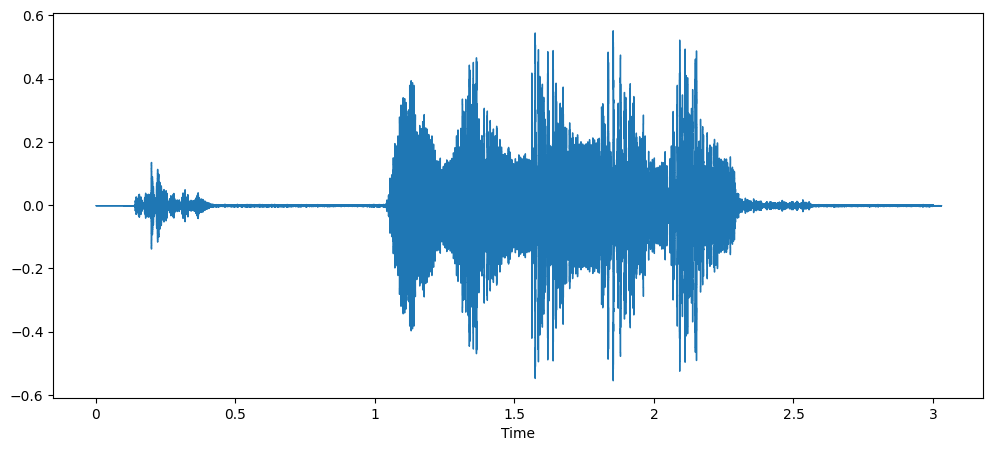

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

data, sample_rate = librosa.load(filepath)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(data, sr=sample_rate)

In [ ]:
sample_rate

22050

In [ ]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)
print(mfccs)

(40, 131)
[[-624.6559    -624.6559    -624.6559    ... -478.4683    -502.9556
  -585.76294  ]
 [   0.           0.           0.        ...   68.96599     63.48271
    34.938877 ]
 [   0.           0.           0.        ...  -18.667868   -12.200213
     9.221901 ]
 ...
 [   0.           0.           0.        ...   -3.8777356   -2.7181442
    -3.8883705]
 [   0.           0.           0.        ...   -4.610424    -5.3082643
    -3.207457 ]
 [   0.           0.           0.        ...   -2.0664184   -4.3038654
    -1.4089806]]


In [ ]:
import os

cat = "/content/drive/MyDrive/ML project SEM2/Animal ds/train ds/CAT Animal-Sound-Train_Dataset"
dog = "/content/drive/MyDrive/ML project SEM2/Animal ds/train ds/DOG Animal-Sound-Train_Dataset"
bird = "/content/drive/MyDrive/ML project SEM2/Animal ds/train ds/BIRD Animal-Sound-Train_Dataset"
cow = "/content/drive/MyDrive/ML project SEM2/Animal ds/train ds/COW Animal-Sound-Train_Dataset"

# Get the list of files in the folder
cat_files = os.listdir(cat)
dog_files = os.listdir(dog)
bird_files = os.listdir(bird)
cow_files = os.listdir(cow)

print("NUMBER OF CAT TRAINING DATA :", len(cat_files))
print("NUMBER OF DOG TRAINING DATA :", len(dog_files))
print("NUMBER OF BIRD TRAINING DATA :", len(bird_files))
print("NUMBER OF COW TRAINING DATA :", len(cow_files))

NUMBER OF CAT TRAINING DATA : 100
NUMBER OF DOG TRAINING DATA : 100
NUMBER OF BIRD TRAINING DATA : 100
NUMBER OF COW TRAINING DATA : 75


In [ ]:
def features_extractor(file):
    #load the file (audio)
    audio, sample_rate = librosa.load(file)
    #we extract mfcc
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #in order to find out scaled feature we do mean of transpose of value
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [ ]:
#Now we ned to extract the featured from all the audio files so we use tqdm
import numpy as np

### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients(mfccs)

frame_dir = cat
frame_dir_lst = cat_files
extc_frame = []

for file_no in frame_dir_lst:
    file = frame_dir + '/' + file_no
    data = features_extractor(file)
    extc_frame.append([data,'CAT'])


In [ ]:
extracted_features_df=pd.DataFrame(extc_frame,columns=['feature','class'])
extracted_features_df.head()


,feature,class
0,"[-436.67154, 145.37813, -4.867814, 47.433548, ...",CAT
1,"[-392.70807, 73.85418, 40.478626, 38.655926, 2...",CAT
2,"[-441.91245, 136.117, -12.658109, 33.26327, -1...",CAT
3,"[-194.46457, 95.7658, -44.06707, 41.336422, -2...",CAT
4,"[-446.33585, 146.45276, -16.170332, 35.21736, ...",CAT


In [ ]:
len(extracted_features_df)

100

In [ ]:
for file_no in dog_files:
    file = dog + '/' + file_no
    data = features_extractor(file)
    extc_frame.append([data,'DOG'])

for file_no in bird_files:
    file = bird + '/' + file_no
    data = features_extractor(file)
    extc_frame.append([data,'BIRD'])

for file_no in cow_files:
    file = cow + '/' + file_no
    data = features_extractor(file)
    extc_frame.append([data,'COW'])

In [ ]:
len(extc_frame)

375

In [ ]:
extracted_features_df=pd.DataFrame(extc_frame,columns=['feature','class'])
extracted_features_df.head()


,feature,class
0,"[-436.67154, 145.37813, -4.867814, 47.433548, ...",CAT
1,"[-392.70807, 73.85418, 40.478626, 38.655926, 2...",CAT
2,"[-441.91245, 136.117, -12.658109, 33.26327, -1...",CAT
3,"[-194.46457, 95.7658, -44.06707, 41.336422, -2...",CAT
4,"[-446.33585, 146.45276, -16.170332, 35.21736, ...",CAT


In [ ]:
extracted_features_df

,feature,class
0,"[-436.67154, 145.37813, -4.867814, 47.433548, ...",CAT
1,"[-392.70807, 73.85418, 40.478626, 38.655926, 2...",CAT
2,"[-441.91245, 136.117, -12.658109, 33.26327, -1...",CAT
3,"[-194.46457, 95.7658, -44.06707, 41.336422, -2...",CAT
4,"[-446.33585, 146.45276, -16.170332, 35.21736, ...",CAT
...,...,...
370,"[-98.388374, 107.6339, -38.3354, 6.5661693, -1...",COW
371,"[-170.48593, 79.36386, -96.65969, -5.669114, 7...",COW
372,"[-276.83047, 150.94466, -98.018715, 35.378212,...",COW
373,"[-141.79344, 39.929474, -69.968346, 79.881546,...",COW


In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())


### Label Encoding -> Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

# Fit and transform the target labels
y_encoded = labelencoder.fit_transform(y)
y=to_categorical(y_encoded)

# Print the original class labels and their corresponding encoded numerical values
print("Original Class Labels:", labelencoder.classes_)
print("Encoded Numerical Values:", np.unique(y_encoded))

### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Original Class Labels: ['BIRD' 'CAT' 'COW' 'DOG']
Encoded Numerical Values: [0 1 2 3]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

### No of classes
num_labels=y.shape[1]
num_labels

4

In [ ]:

model = Sequential()

# First layer
model.add(Dense(256, input_shape=(40,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Second layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Third layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 256)               10496     
                                                                 
 batch_normalization_36 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 activation_48 (Activation)  (None, 256)               0         
                                                                 
 dropout_36 (Dropout)        (None, 256)               0         
                                                                 
 dense_49 (Dense)            (None, 512)               131584    
                                                                 
 batch_normalization_37 (Ba  (None, 512)               2048      
 tchNormalization)                                   

In [ ]:
## Trianing the model
# from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime
num_epochs = 50
num_batch_size = 128

# start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1)
duration = datetime.now()

Epoch 1/50
3/3 [==============================] - 4s 307ms/step - loss: 1.8072 - accuracy: 0.3067 - val_loss: 4.5113 - val_accuracy: 0.4267
Epoch 2/50
3/3 [==============================] - 0s 73ms/step - loss: 0.9606 - accuracy: 0.5867 - val_loss: 5.5820 - val_accuracy: 0.4400
Epoch 3/50
3/3 [==============================] - 0s 62ms/step - loss: 0.6617 - accuracy: 0.7533 - val_loss: 5.8152 - val_accuracy: 0.4800
Epoch 4/50
3/3 [==============================] - 0s 61ms/step - loss: 0.5717 - accuracy: 0.7867 - val_loss: 5.5650 - val_accuracy: 0.5067
Epoch 5/50
3/3 [==============================] - 0s 65ms/step - loss: 0.4383 - accuracy: 0.8500 - val_loss: 5.0320 - val_accuracy: 0.5467
Epoch 6/50
3/3 [==============================] - 0s 56ms/step - loss: 0.4356 - accuracy: 0.8533 - val_loss: 4.4631 - val_accuracy: 0.5600
Epoch 7/50
3/3 [==============================] - 0s 48ms/step - loss: 0.3716 - accuracy: 0.8533 - val_loss: 3.8884 - val_accuracy: 0.5600
Epoch 8/50
3/3 [==========

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

3/3 [==============================] - 0s 11ms/step
Confusion Matrix:
[[23  0  0  0]
 [ 1 23  1  1]
 [ 0  0 11  1]
 [ 0  0  0 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.88      0.94        26
           2       0.92      0.92      0.92        12
           3       0.88      1.00      0.93        14

    accuracy                           0.95        75
   macro avg       0.94      0.95      0.94        75
weighted avg       0.95      0.95      0.95        75



In [ ]:
y_pred_classes

array([3, 0, 2, 0, 0, 3, 0, 3, 1, 1, 2, 3, 1, 2, 2, 0, 1, 3, 3, 2, 3, 1,
       0, 3, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 3, 2, 3, 3, 1, 2, 1, 2, 2, 2,
       1, 1, 0, 2, 1, 1, 0, 1, 0, 3, 1, 0, 1, 1, 1, 3, 0, 0, 0, 3, 0, 3,
       1, 0, 0, 0, 3, 1, 0, 0, 0])

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9466666579246521


In [ ]:
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

3/3 [==============================] - 0s 8ms/step
[3 0 2 0 0 3 0 3 1 1 2 3 1 2 2 0 1 3 3 2 3 1 0 3 0 1 0 0 1 1 2 1 1 0 3 2 3
 3 1 2 1 2 2 2 1 1 0 2 1 1 0 1 0 3 1 0 1 1 1 3 0 0 0 3 0 3 1 0 0 0 3 1 0 0
 0]


1/1 [==============================] - 0s 47ms/step
It's a DOG


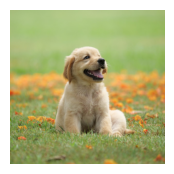

Predicted Label: 3


In [ ]:
# Function to predict label for a single audio file

import matplotlib.pyplot as plt
from PIL import Image

def predict_label(file_path, model):
    # Extract features from the audio file
    features = features_extractor(file_path)

    # Reshape features to match model input shape
    features = np.expand_dims(features, axis=0)

    # Make prediction using the model
    prediction = model.predict(features)

    # Convert prediction to class label
    predicted_class = np.argmax(prediction)

    return predicted_class

# Example usage
file_path = "/content/drive/MyDrive/ML project SEM2/Animal ds/test ds/Adit bark.wav"
predicted_label = predict_label(file_path, model)

# Print the predicted label and display corresponding image
if predicted_label == 0:
    print("It's a BIRD")
    image_path = "/content/drive/MyDrive/Animal ds/animals_images/bird.jpg"
elif predicted_label == 1:
    print("It's a CAT")
    image_path = "/content/drive/MyDrive/Animal ds/animals_images/cat.jpg"
elif predicted_label == 2:
    print("It's a COW")
    image_path = "/content/drive/MyDrive/Animal ds/animals_images/cow.jpg"
else:
    print("It's a DOG")
    image_path = "/content/drive/MyDrive/Animal ds/animals_images/dog.jpg"

# Open the image
image = Image.open(image_path)

# Set the size of the displayed image
plt.figure(figsize=(2, 2))  # Set the figure size (2x2 inches)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

print("Predicted Label:", predicted_label)


In [ ]:
# Bird -------> 0
# cat  -------> 1
# cow  -------> 2
# Dog  -------> 3
